In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Problem Statement: Understand spending habits of Walmart customers**

**Shape**

In [ ]:
df.shape

(550068, 10)

**Information on dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Converting dtype of the below columns to object**

In [ ]:
df['User_ID'] = df['User_ID'].astype('object')
df['Occupation'] = df['Occupation'].astype('object')
df['Marital_Status'] = df['Marital_Status'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('object')

**Checking for missing values**

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# **Unique attributes & value counts**

In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df.describe(include=['O'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

# **Univariate Analysis (@ Transaction Level)**

**Feature: Gender, Marital_Status, City_Category, Stay_In_Current_City_Years**

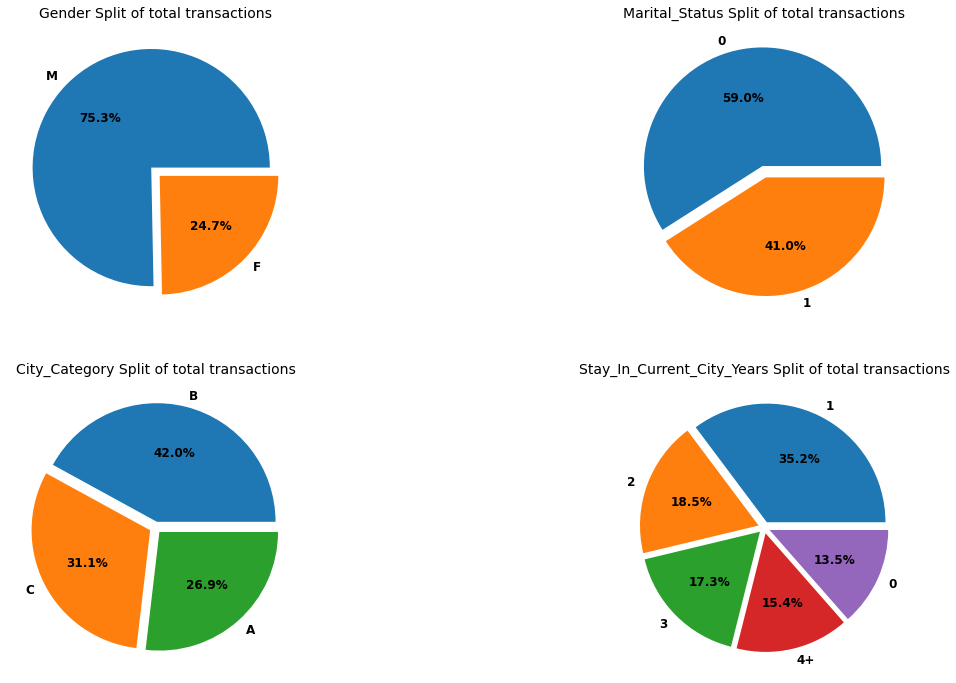

In [ ]:
cat_cols1 = ['Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years']
id = 1
plt.figure(figsize=(20, 12))
for col in cat_cols1:
    plt.subplot(2, 2, id)
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index,
            explode=(0.05, )*len(df[col].value_counts().values), autopct='%.1f%%',
            textprops = {'fontweight': 'bold', 'fontsize': 12})
    plt.title(f'{col} Split of total transactions', fontsize=14)
    id += 1

***Observations:***

- Gender split:
    - 3/4 of total transactions made by males
- Marital Status split:
    - 60% of total transactions made by singles
- Similar information is shown for City Category & Stay_In_Current_City_Years

**Feature: Age**

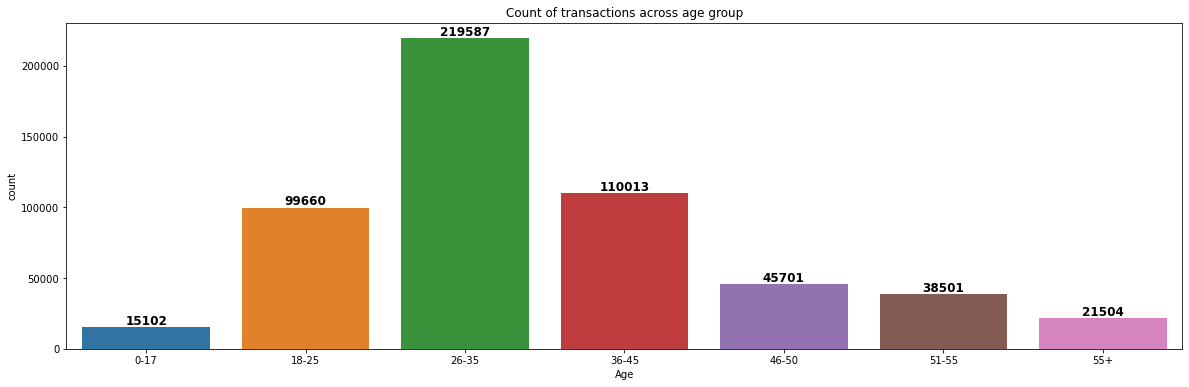

In [ ]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
plt.figure(figsize=(20, 6))
f = sns.countplot(x=df['Age'], order=age_order)
for item in f.containers:
    f.bar_label(item, fontsize=12, fontweight='bold')
plt.title('Count of transactions across age group')
plt.show()

***Observations:***

- Most transactions are made by customers in the age range 26-35

**Feature: Product_Category**

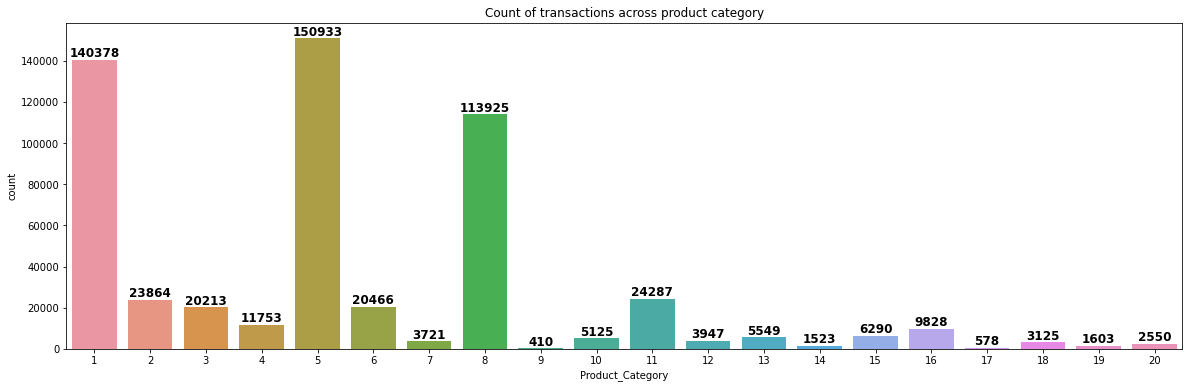

In [ ]:
plt.figure(figsize=(20, 6))
f = sns.countplot(x=df['Product_Category'])
for item in f.containers:
    f.bar_label(item, fontsize=12, fontweight='bold')
plt.title('Count of transactions across product category')
plt.show()

***Observations:***

- Popular product Categories:
    - 1, 5, 8
    - These categories have recored the maximum number of transactions

**Feature: Purchase (with Outlier Detection)**

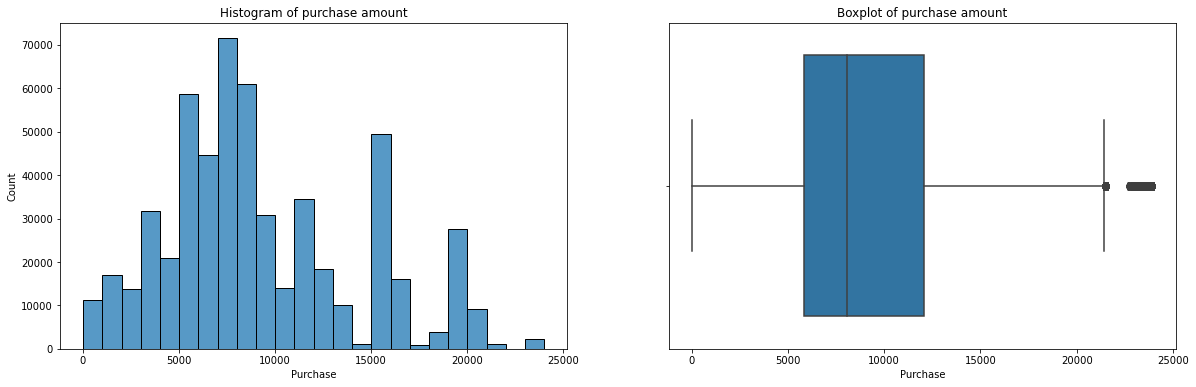

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
f = sns.histplot(x=df['Purchase'], binwidth=1000)
# for item in f.containers:
#     f.bar_label(item, fontsize=10, fontweight='bold', rotation=30)
# f = sns.kdeplot(x=df['Purchase'])
plt.title('Histogram of purchase amount')
plt.subplot(1, 2, 2)
f = sns.boxplot(x=df['Purchase'])
plt.title('Boxplot of purchase amount')
plt.show()

In [ ]:
purchase_25 = np.percentile(df['Purchase'], 25)
purchase_50 = np.percentile(df['Purchase'], 50)
purchase_75 = np.percentile(df['Purchase'], 75)
iqr = purchase_75 - purchase_25
upper = purchase_75 + 1.5*iqr
lower = purchase_25 - 1.5*iqr
print('Median:', purchase_50)
print('IQR:', iqr)
print('Lower Whisker:', max(0, lower))
print('Upper Whisker:', upper)

Median: 8047.0
IQR: 6231.0
Lower Whisker: 0
Upper Whisker: 21400.5


***Observations:***
- Outliers are above 21400 (by 1.5*IQR)

# **Bivariate Analysis (@ Transaction Level)**

**Transaction amount across Gender, Marital_Status, City_Category, Stay_In_Current_City_Years**

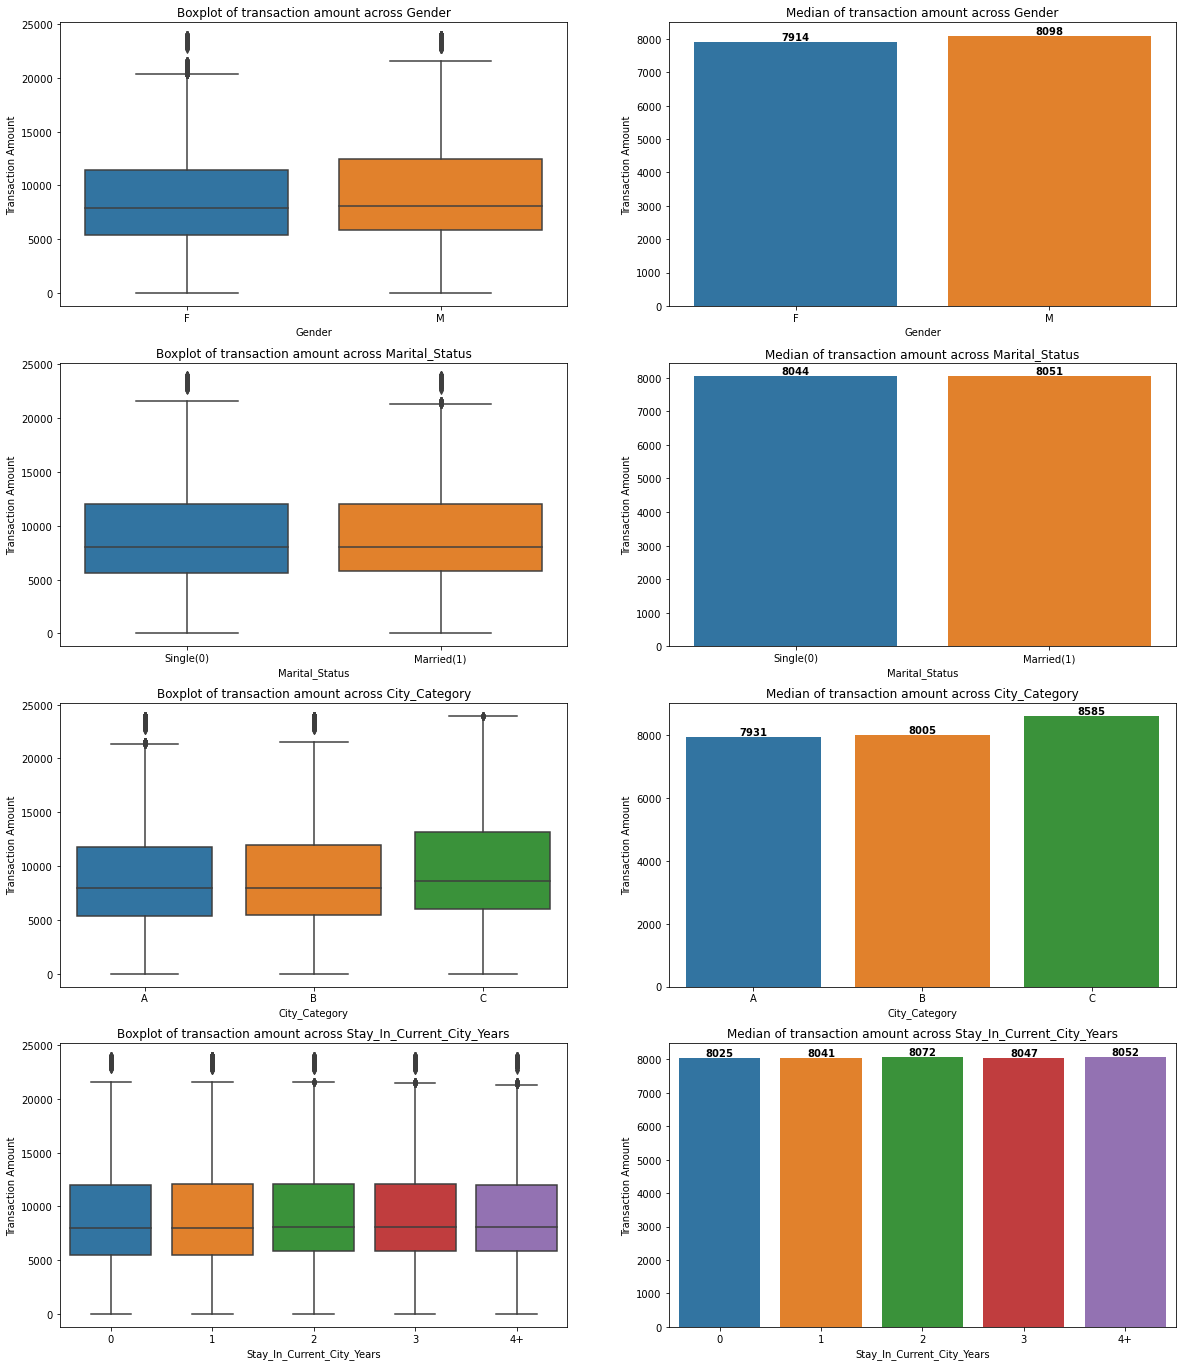

In [ ]:
plt.figure(figsize=(20, 24))
plt.subplot(4, 2, 1)
sns.boxplot(y=df['Purchase'], x=df['Gender'])
plt.ylabel('Transaction Amount')
plt.title('Boxplot of transaction amount across Gender')
plt.subplot(4, 2, 2)
f = sns.barplot(y=df['Purchase'], x=df['Gender'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Transaction Amount')
plt.title('Median of transaction amount across Gender')

plt.subplot(4, 2, 3)
sns.boxplot(y=df['Purchase'], x=df['Marital_Status'].apply(lambda x: 'Single(0)' if x==0 else 'Married(1)'))
plt.ylabel('Transaction Amount')
plt.title('Boxplot of transaction amount across Marital_Status')
plt.subplot(4, 2, 4)
f = sns.barplot(y=df['Purchase'], x=df['Marital_Status'].apply(lambda x: 'Single(0)' if x==0 else 'Married(1)'), ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Transaction Amount')
plt.title('Median of transaction amount across Marital_Status')

plt.subplot(4, 2, 5)
sns.boxplot(y=df['Purchase'], x=df['City_Category'], order=['A', 'B', 'C'])
plt.ylabel('Transaction Amount')
plt.title('Boxplot of transaction amount across City_Category')
plt.subplot(4, 2, 6)
f = sns.barplot(y=df['Purchase'], x=df['City_Category'], order=['A', 'B', 'C'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Transaction Amount')
plt.title('Median of transaction amount across City_Category')

plt.subplot(4, 2, 7)
sns.boxplot(y=df['Purchase'], x=df['Stay_In_Current_City_Years'], order=['0', '1', '2', '3', '4+'])
plt.ylabel('Transaction Amount')
plt.title('Boxplot of transaction amount across Stay_In_Current_City_Years')
plt.subplot(4, 2, 8)
f = sns.barplot(y=df['Purchase'], x=df['Stay_In_Current_City_Years'], order=['0', '1', '2', '3', '4+'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Transaction Amount')
plt.title('Median of transaction amount across Stay_In_Current_City_Years')

plt.show()

***Observations:***
- Median transaction amount of males is slighly higher than females
- Median transaction amount across marital status is indifferent
- Median transaction amount of city category 'C' is the highest
- Median transaction amount across Stay_In_Current_City_Years is indifferent

**Transaction amount amount across Age**

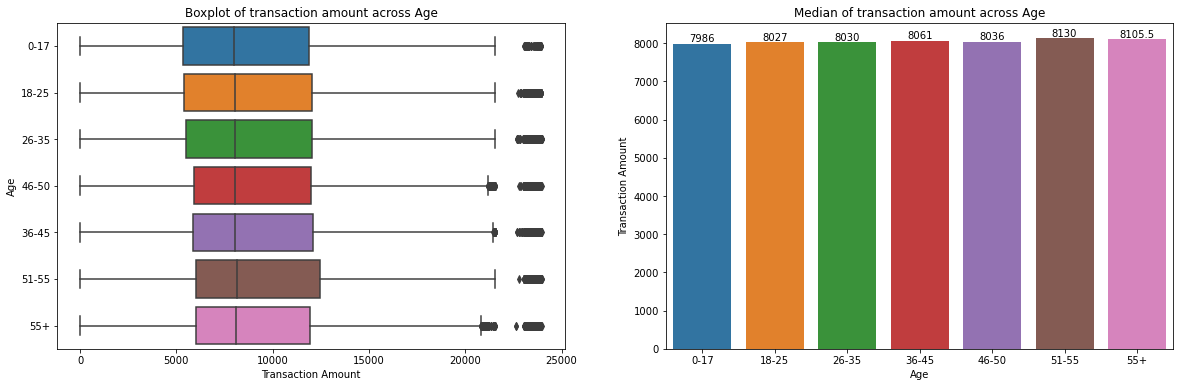

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Purchase'], y=df['Age'], order=['0-17', '18-25', '26-35', '46-50', '36-45', '51-55', '55+'])
plt.xlabel('Transaction Amount')
plt.title('Boxplot of transaction amount across Age')
plt.subplot(1, 2, 2)
f = sns.barplot(y=df['Purchase'], x=df['Age'], order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item)
plt.ylabel('Transaction Amount')
plt.title('Median of transaction amount across Age')
plt.show()

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


***Observations:***
- Median transaction amount across age brackets do not change much

**Transaction amount across Product_Category**

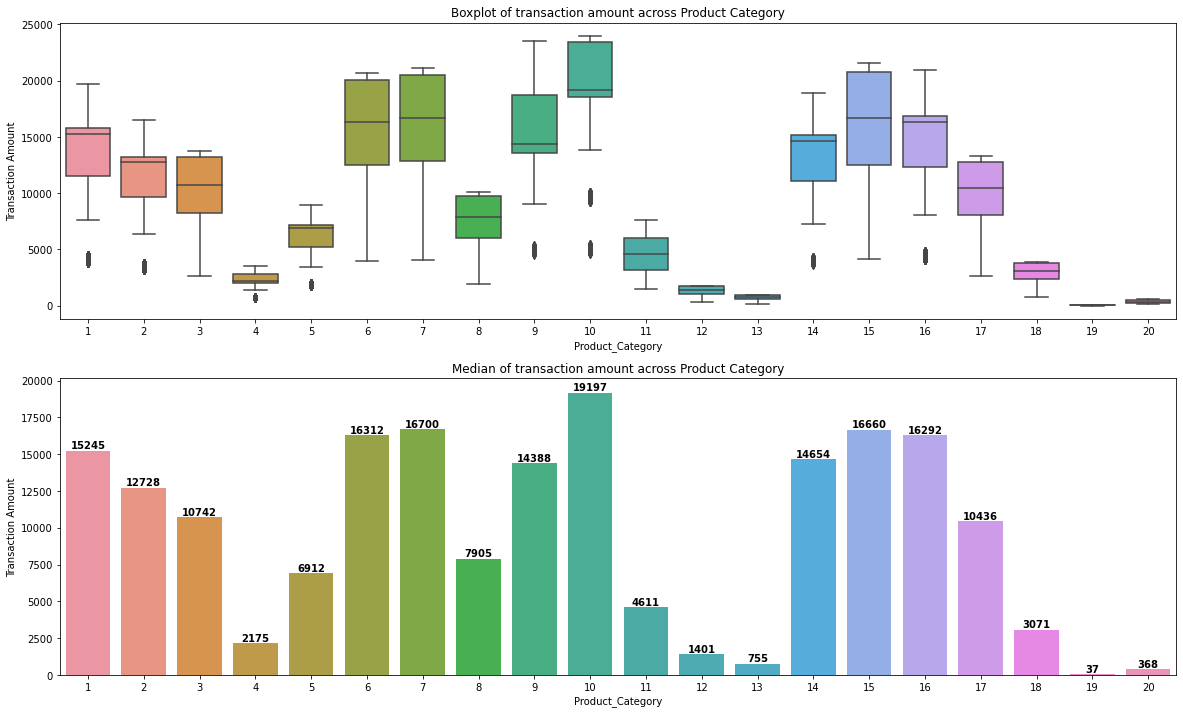

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)
sns.boxplot(y=df['Purchase'], x=df['Product_Category'])
plt.ylabel('Transaction Amount')
plt.title('Boxplot of transaction amount across Product Category')
plt.subplot(2, 1, 2)
f = sns.barplot(y=df['Purchase'], x=df['Product_Category'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold', fmt='%.0f')
plt.ylabel('Transaction Amount')
plt.title('Median of transaction amount across Product Category')
# plt.subplot(3, 1, 3)
# f = sns.barplot(y=df['Purchase'], x=df['Product_Category'], ci=None, estimator=np.sum)
# for item in f.containers:
#     f.bar_label(item, fontsize=8, fontweight='bold', fmt='%.0f')
# plt.ylabel('Transaction Amount')
# plt.title('Sum of transaction amount across Product Category')
plt.show()

In [ ]:
df.groupby('Product_Category')['Purchase'].describe().sort_values(['50%'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
10,5125.0,19675.570927,4225.721898,4624.0,18546.00,19197.0,23438.00,23961.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
15,6290.0,14780.451828,5175.465852,4148.0,12523.25,16660.0,20745.75,21569.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
16,9828.0,14766.037037,4360.213198,4036.0,12354.00,16292.5,16831.00,20971.0
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
14,1523.0,13141.625739,4069.009293,3657.0,11097.00,14654.0,15176.50,18931.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0


***Observations:***
- Expensive product categories:
    - 10, 7, 15
- Cheap product categories:
    - 19, 20, 13

# **Bivariate/Multivariate Analysis (@ Customer Level)**

In [ ]:
df_customer = df.groupby(['User_ID', 'Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'Age'])['Purchase'].agg(['sum', 'count']).reset_index()
df_customer

,User_ID,Gender,Marital_Status,City_Category,Stay_In_Current_City_Years,Age,sum,count
0,1000001,F,0,A,2,0-17,334093,35
1,1000002,M,0,C,4+,55+,810472,77
2,1000003,M,0,A,3,26-35,341635,29
3,1000004,M,1,B,2,46-50,206468,14
4,1000005,M,1,A,1,26-35,821001,106
...,...,...,...,...,...,...,...,...
5886,1006036,F,1,B,4+,26-35,4116058,514
5887,1006037,F,0,C,4+,46-50,1119538,122
5888,1006038,F,0,C,2,55+,90034,12
5889,1006039,F,1,B,4+,46-50,590319,74


**Mean number of transactions made by:**
- Males vs Females
- Single vs Married

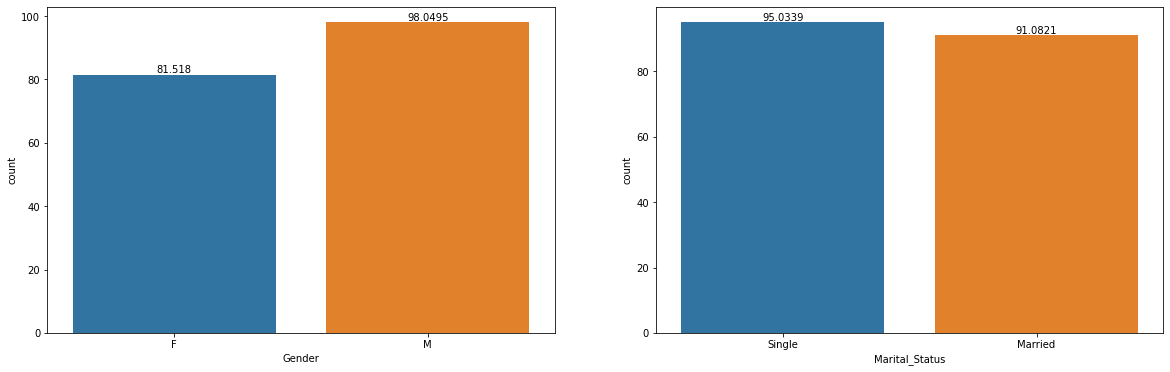

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
f = sns.barplot(data=df_customer, x='Gender', y='count', ci=None)
for item in f.containers:
    f.bar_label(item)
plt.subplot(1, 2, 2)
f = sns.barplot(data=df_customer, x=df_customer['Marital_Status'].apply(lambda x: 'Single' if x == 0 else 'Married'), y=df_customer['count'], ci=None)
for item in f.containers:
    f.bar_label(item)

**Amount spent by customer across Gender, Marital_Status, City_Category, Stay_In_Current_City_Years**

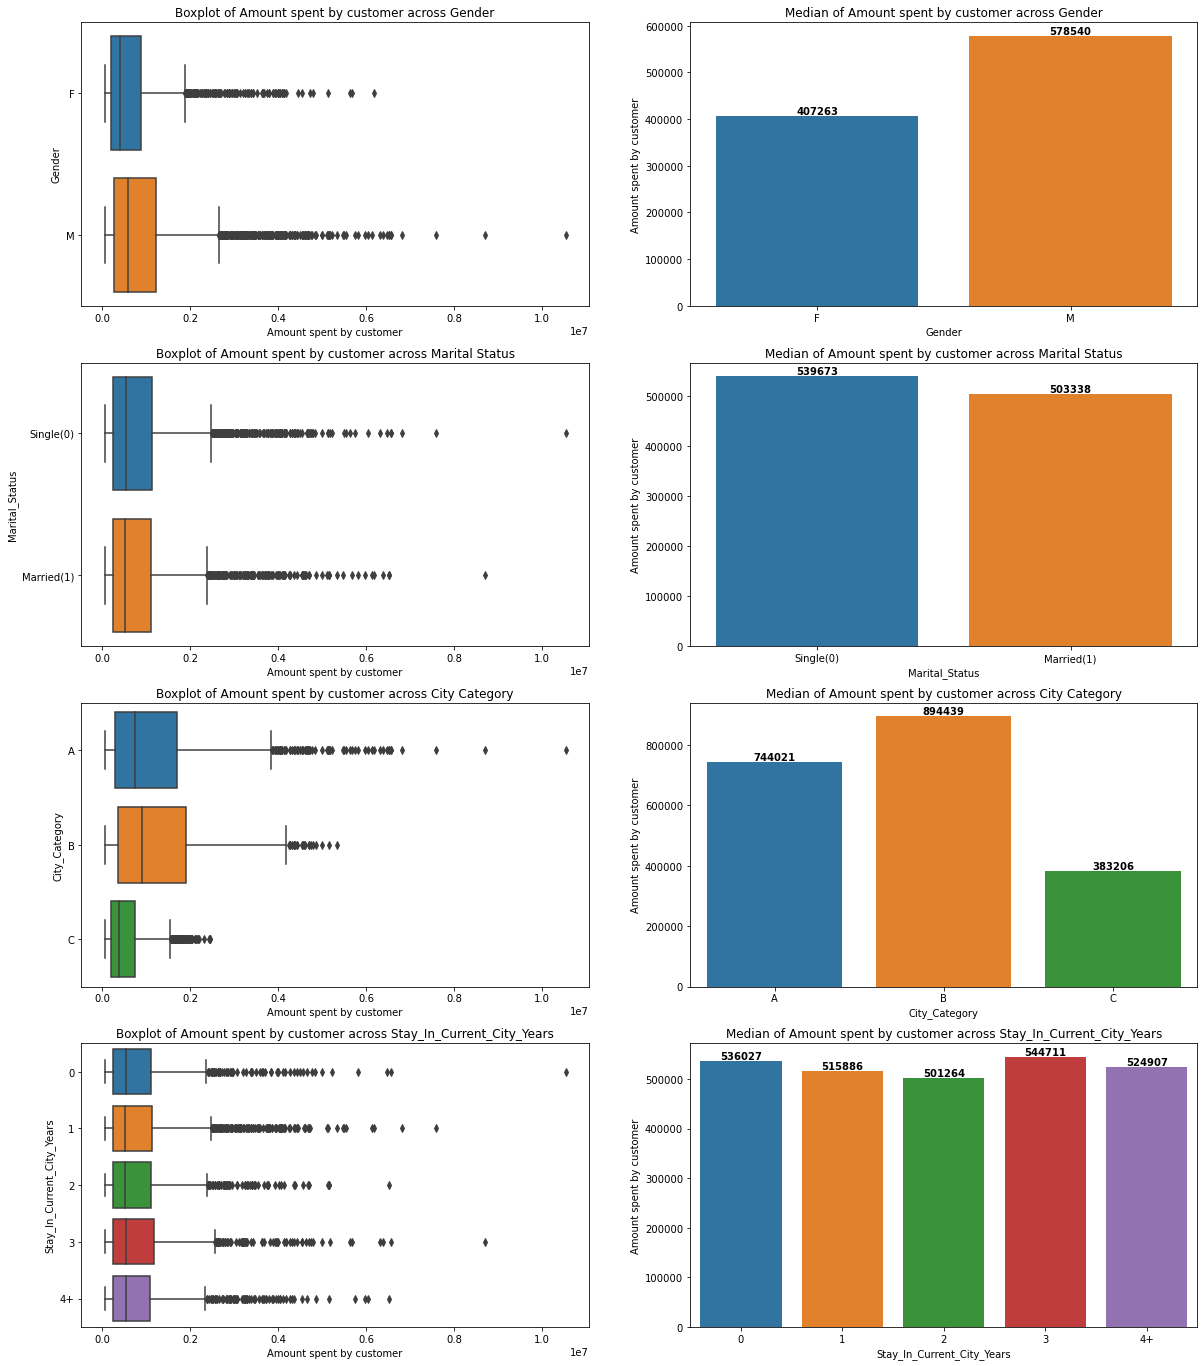

In [ ]:
plt.figure(figsize=(20, 24))
plt.subplot(4, 2, 1)
sns.boxplot(x=df_customer['sum'], y=df_customer['Gender'])
plt.xlabel('Amount spent by customer')
plt.title('Boxplot of Amount spent by customer across Gender')
plt.subplot(4, 2, 2)
f = sns.barplot(y=df_customer['sum'], x=df_customer['Gender'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Amount spent by customer')
plt.title('Median of Amount spent by customer across Gender')

plt.subplot(4, 2, 3)
sns.boxplot(x=df_customer['sum'], y=df_customer['Marital_Status'].apply(lambda x: 'Single(0)' if x==0 else 'Married(1)'))
plt.xlabel('Amount spent by customer')
plt.title('Boxplot of Amount spent by customer across Marital Status')
plt.subplot(4, 2, 4)
f = sns.barplot(y=df_customer['sum'], x=df_customer['Marital_Status'].apply(lambda x: 'Single(0)' if x==0 else 'Married(1)'), ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Amount spent by customer')
plt.title('Median of Amount spent by customer across Marital Status')


plt.subplot(4, 2, 5)
sns.boxplot(x=df_customer['sum'], y=df_customer['City_Category'], order=['A', 'B', 'C'])
plt.xlabel('Amount spent by customer')
plt.title('Boxplot of Amount spent by customer across City Category')
plt.subplot(4, 2, 6)
f = sns.barplot(y=df_customer['sum'], x=df_customer['City_Category'], order=['A', 'B', 'C'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Amount spent by customer')
plt.title('Median of Amount spent by customer across City Category')

plt.subplot(4, 2, 7)
sns.boxplot(x=df_customer['sum'], y=df_customer['Stay_In_Current_City_Years'], order=['0', '1', '2', '3', '4+'])
plt.xlabel('Amount spent by customer')
plt.title('Boxplot of Amount spent by customer across Stay_In_Current_City_Years')
plt.subplot(4, 2, 8)
f = sns.barplot(y=df_customer['sum'], x=df_customer['Stay_In_Current_City_Years'], order=['0', '1', '2', '3', '4+'], ci=None, estimator=np.median)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Amount spent by customer')
plt.title('Median of Amount spent by customer across Stay_In_Current_City_Years')

plt.show()

***Observations:***
- Median amount spent by males is higher than females
- Median amount spent across marital status does not vary too much across single and married customers
- Median amount spent by customers in City Category B is the highest and in C is the lowest
- Median amount spent by customers across Stay_In_Current_City_Years does not vary too much

**Amount spent by customer across Age**

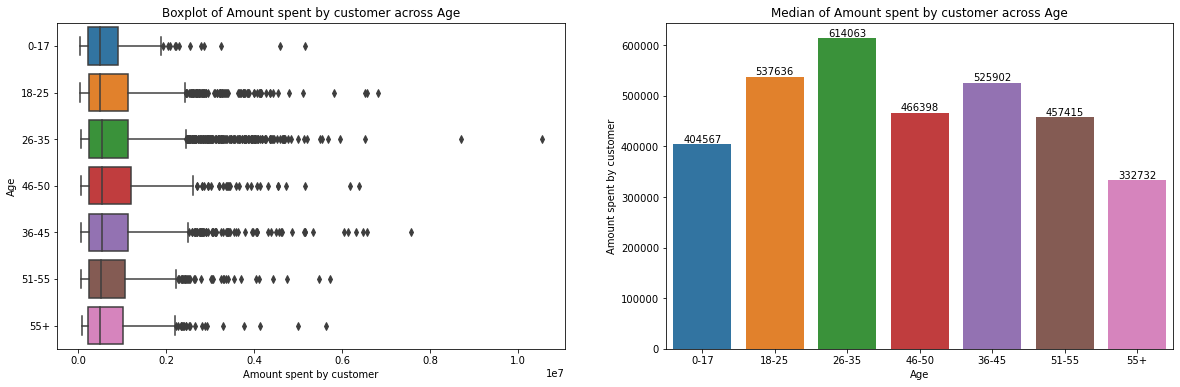

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_customer['sum'], y=df['Age'], order=['0-17', '18-25', '26-35', '46-50', '36-45', '51-55', '55+'])
plt.xlabel('Amount spent by customer')
plt.title('Boxplot of Amount spent by customer across Age')
plt.subplot(1, 2, 2)
f = sns.barplot(data=df_customer, y='sum', x='Age', ci=None, order=['0-17', '18-25', '26-35', '46-50', '36-45', '51-55', '55+'], estimator=np.median)
for item in f.containers:
    f.bar_label(item)
plt.ylabel('Amount spent by customer')
plt.title('Median of Amount spent by customer across Age')

plt.show()

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


***Observations:***
- Median amount spent by customers in the range 26-35 is the highest
- Median amount spent by customers in the range 55+ is the lowest

**Amount spent by customer across City_Category & Age**

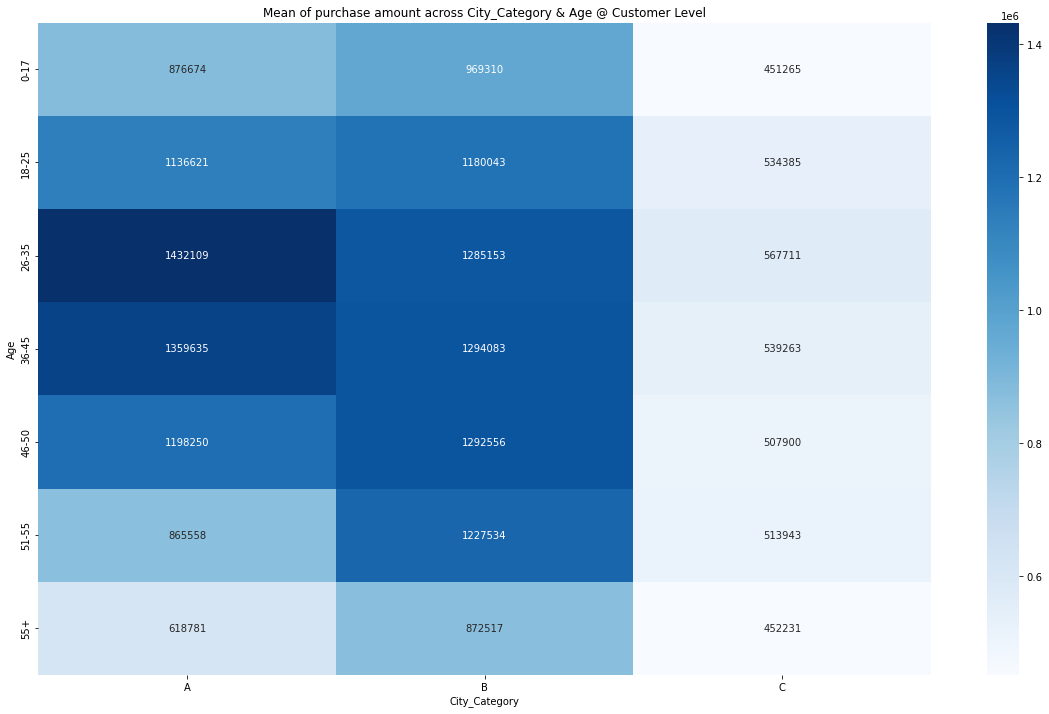

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.pivot_table(data=df_customer, index='Age', columns='City_Category', values='sum', aggfunc='mean'),
            cmap='Blues', annot=True, fmt='.0f')
plt.title('Mean of purchase amount across City_Category & Age @ Customer Level')
plt.show()

***Observations:***
- Mean amount spent per customer is highest for those customers who belong to city category A and age 26-35  
- Mean amount spent per customer from city category C is substantially less than A and B

**Amount spent by customer across Gender & Product Category**

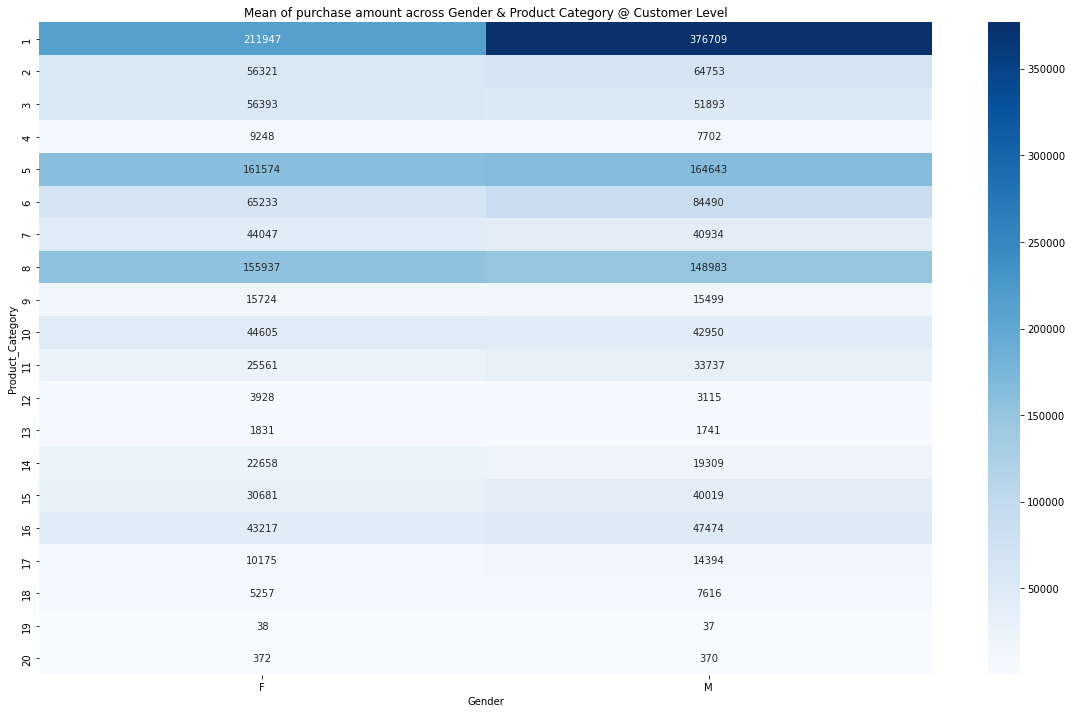

In [ ]:
df_customer_prodCat = df.groupby(['User_ID', 'Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'Age', 'Product_Category'])['Purchase'].agg(['sum']).reset_index()
plt.figure(figsize=(20,12))
sns.heatmap(pd.pivot_table(data=df_customer_prodCat, index='Product_Category', columns='Gender', values='sum', aggfunc='mean'),
            cmap='Blues', annot=True, fmt='.0f')
plt.title('Mean of purchase amount across Gender & Product Category @ Customer Level')
plt.show()

***Observations:***
- Mean amount spent per customer is highest for males and product category 1
- Mean amount spent per customer is higher for product categories 1, 5, 8
    - This is to be expected since earlier we identified the above product categories as the most popular categories

# **Questions:**

## **Q1. Are women spending more money per transaction than men? Why or Why not?**

- We look at the data at the transaction level and classify the transactions into 2 categories:
    - Male transaction
    - Female transaction

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

- In our dataset, we have following number of data points:
    - Male: 414k
    - Female: 135k

In [ ]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


- We have found out the following:
    - Mean transaction amount for Males (across 414k transactions): 9437
    - Mean transaction amount for Females (across 135k transactions): 8734
    - Below we have plotted the distribution of transaction amount for both males and females. Clearly it is not gaussian.

In [ ]:
df_male_transac = df.loc[df['Gender']=='M', 'Purchase']
df_female_transac = df.loc[df['Gender']=='F', 'Purchase']

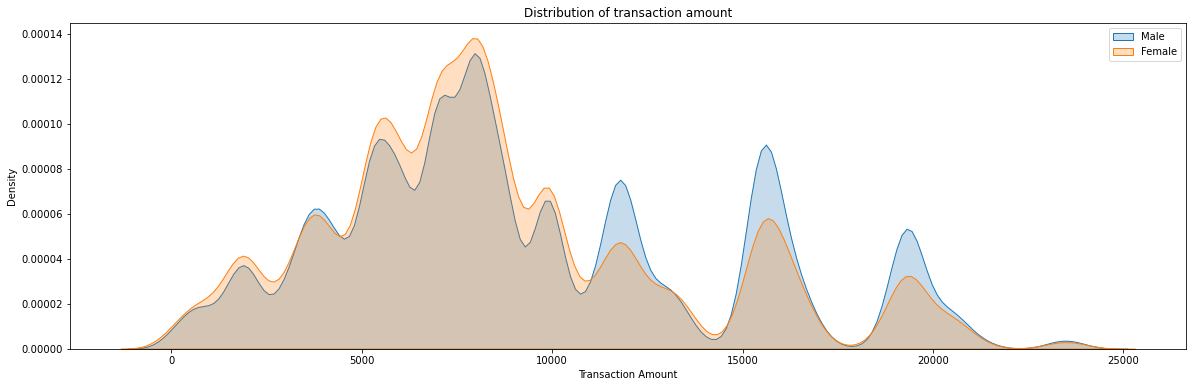

In [ ]:
plt.figure(figsize=(20, 6))
sns.kdeplot(x=df_male_transac, fill=True, label='Male')
sns.kdeplot(x=df_female_transac, fill=True, label='Female')
plt.ticklabel_format(scilimits=(-6, 5))
plt.xlabel('Transaction Amount')
plt.title('Distribution of transaction amount')
plt.legend()
plt.show()

- From the available data points, we randomly collect samples and compute the distribution of the sample mean.
    - We perform this experiment for Male and Female seperately
    - We perform this expeiment for different sample sizes and see how the distributions change

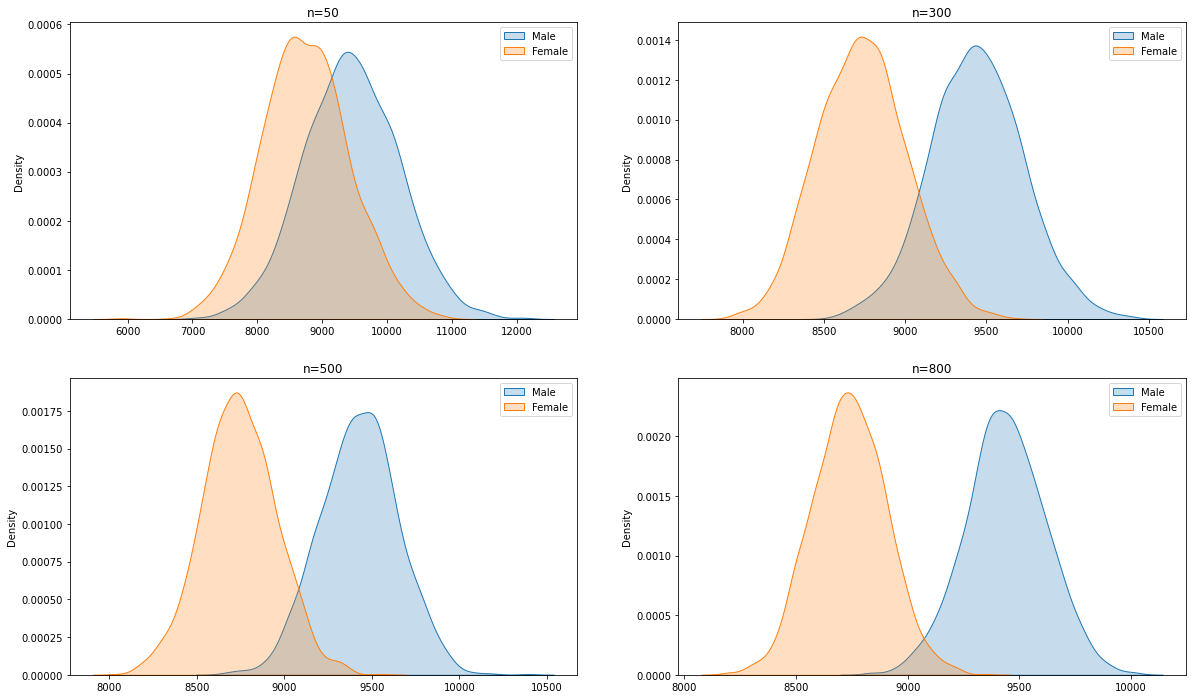

In [ ]:
sample_size = [50, 300, 500, 800]
d_transaction_Gender = {'Male': {}, 'Female': {}}
plt.figure(figsize=(20, 12))
id = 1
for size in sample_size:
    plt.subplot(2, 2, id)
    sample_means_lst_M = []
    sample_means_lst_F = []
    for _ in range(2000):
        sample_M = df_male_transac.sample(size)
        sample_F = df_female_transac.sample(size)
        sample_mean_M = np.mean(sample_M)
        sample_mean_F = np.mean(sample_F)
        sample_means_lst_M.append(sample_mean_M)
        sample_means_lst_F.append(sample_mean_F)
    f = sns.kdeplot(sample_means_lst_M, label=f'Male', fill=True)
    f = sns.kdeplot(sample_means_lst_F, label=f'Female', fill=True)
    f.ticklabel_format(scilimits=(-6, 7))
    f.legend()
    plt.title(f'n={size}')
    d_transaction_Gender['Male'][size] = (round(np.mean(sample_means_lst_M), 2), round(np.std(sample_means_lst_M), 2))
    d_transaction_Gender['Female'][size] = (round(np.mean(sample_means_lst_F), 2), round(np.std(sample_means_lst_F), 2))
    id += 1

plt.show()

***Observations:***

- We have performed this experiment for different sample sizes: 50, 300, 500, 800
- In all the cases, the sampliong mean distribution is fairly Gaussian
- We need a sample size of about 800 such that the distributions of sampling mean for Male and Female barely overlap

In [ ]:
pd.DataFrame(d_transaction_Gender)

,Male,Female
50,"(9443.1, 728.51)","(8748.23, 670.16)"
300,"(9440.66, 288.2)","(8733.45, 271.85)"
500,"(9426.37, 223.9)","(8741.08, 212.71)"
800,"(9437.98, 180.28)","(8737.89, 165.61)"


***95% CI for mean transaction amount across Males and Females:***
- Males:
    - [9438-(1.96\*180), 9438+(1.96\*180)] = [9085, 9790]
- Females:
    - [8738-(1.96\*166), 8738+(1.96\*166)] = [8413, 9063]
- We can conclude with 95% Confidence that the mean transaction amount of males is higher than that of females
- We need a sample size of around 800 to be able to make that conclusion

***Why is mean transaction amount of females less than that of males?***

- We observe that males have a comparatively higher number of high-value transactions(>10k) which shifts the mean transaction amount for males higher.
- The piechart below tells us that almost 36% of total male transactions are above 10k while only 29% of total female transactions are above 10k.

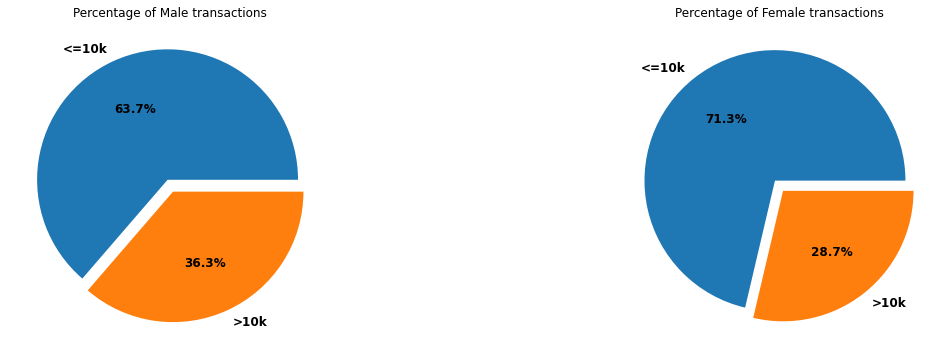

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.pie((df_male_transac > 10000).value_counts(), labels=['<=10k', '>10k'], explode=(0.05, 0.05), autopct='%.1f%%', textprops={'fontweight':'bold', 'fontsize': 12})
plt.title('Percentage of Male transactions')
plt.subplot(1, 2, 2)
plt.pie((df_female_transac > 10000).value_counts(), labels=['<=10k', '>10k'], explode=(0.05, 0.05), autopct='%.1f%%', textprops={'fontweight':'bold', 'fontsize': 12})
plt.title('Percentage of Female transactions')
plt.show()

## **Q2. Confidence intervals and distribution of the mean of the expenses by female and male customers**
- For this question, we look at the data at the customer level and find the total amount spent by each customer

In [ ]:
df_purchase_byGender = df.groupby(['User_ID', 'Gender'])['Purchase'].agg(['count', 'sum']).reset_index()
df_purchase_byGender.head()

,User_ID,Gender,count,sum
0,1000001,F,35,334093
1,1000002,M,77,810472
2,1000003,M,29,341635
3,1000004,M,14,206468
4,1000005,M,106,821001


In [ ]:
df_purchase_byGender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

- In our dataset, we have following number of data points:
    - Male: 4.2k
    - Female: 1.6k

In [ ]:
df_purchase_byGender.groupby('Gender')['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,1666.0,712024.394958,807370.726146,46681.0,202654.75,407263.0,873772.0,6187094.0
M,4225.0,925344.402367,985830.100795,49288.0,258589.00,578540.0,1215237.0,10536909.0


- We have found out the following:
    - Mean amount spent by Males (across 4.2k males): 925344
    - Mean amount spent by Females (across 1.6k females): 712024
    - Below we have plotted the distribution of amount spent by a customer for both males and females. Clearly it is not gaussian.

In [ ]:
df_purchase_byGender_M = df_purchase_byGender.loc[df_purchase_byGender['Gender']=='M', 'sum']
df_purchase_byGender_F = df_purchase_byGender.loc[df_purchase_byGender['Gender']=='F', 'sum']

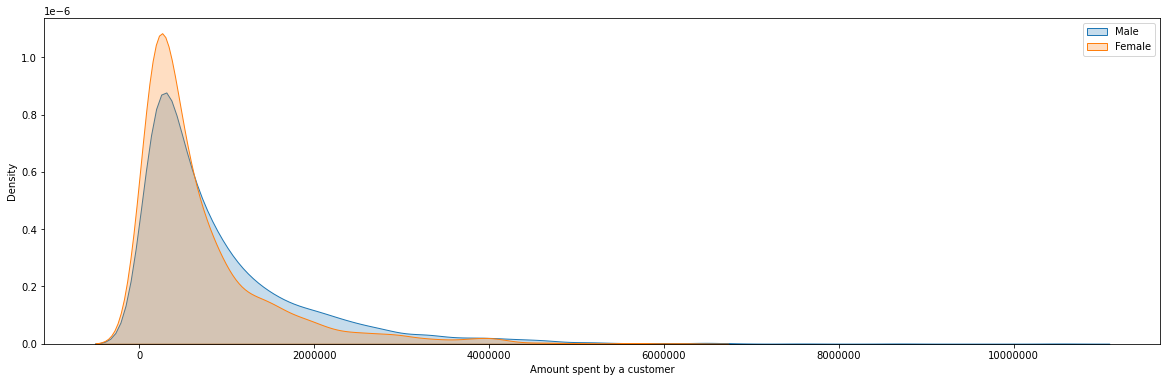

In [ ]:
plt.figure(figsize=(20, 6))
sns.kdeplot(x=df_purchase_byGender_M, fill=True, label='Male')
sns.kdeplot(x=df_purchase_byGender_F, fill=True, label='Female')
plt.ticklabel_format(scilimits=(-6, 8))
plt.xlabel('Amount spent by a customer')
plt.legend()
plt.show()

- From the available data points, we randomly collect samples and compute the distribution of the sample mean.
    - We perform this experiment for Male and Female seperately
    - We perform this expeiment for different sample sizes and see how the distributions change

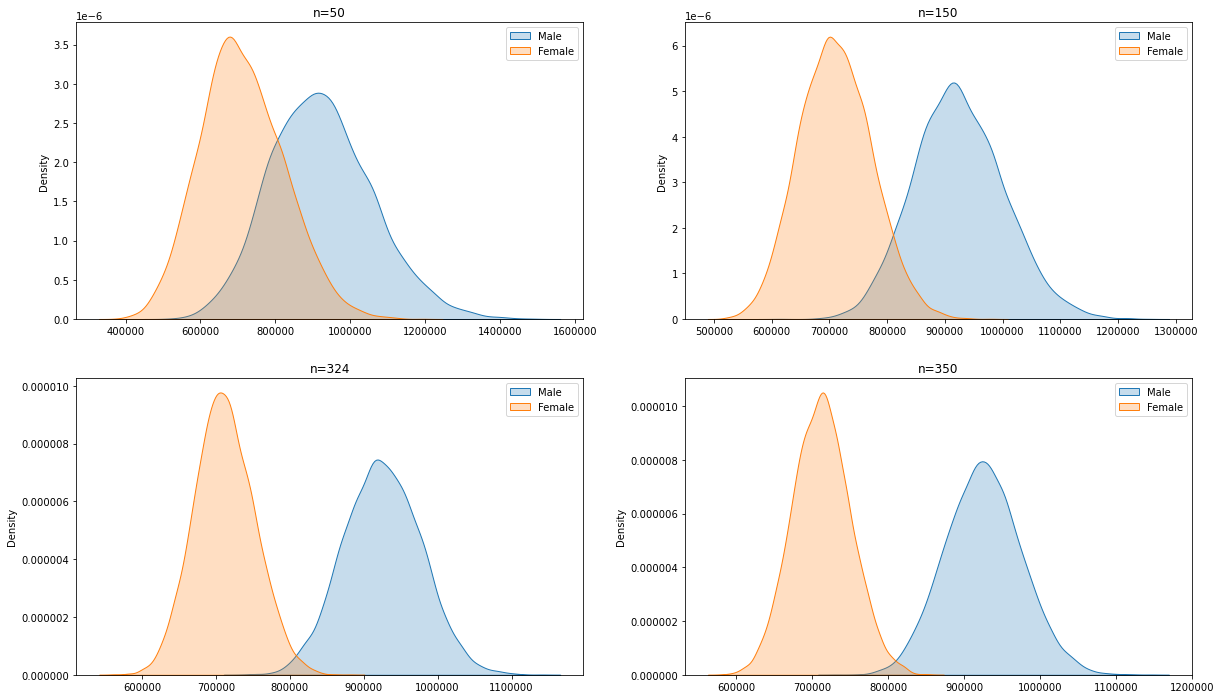

In [ ]:
sample_size = [50, 150, 324, 350]
d_Gender = {'Male': {}, 'Female': {}}
plt.figure(figsize=(20, 12))
id = 1
for size in sample_size:
    plt.subplot(2, 2, id)
    sample_means_lst_M = []
    sample_means_lst_F = []
    for _ in range(10000):
        sample_M = df_purchase_byGender_M.sample(size)
        sample_F = df_purchase_byGender_F.sample(size)
        sample_mean_M = np.mean(sample_M)
        sample_mean_F = np.mean(sample_F)
        sample_means_lst_M.append(sample_mean_M)
        sample_means_lst_F.append(sample_mean_F)
    f = sns.kdeplot(sample_means_lst_M, label=f'Male', fill=True)
    f = sns.kdeplot(sample_means_lst_F, label=f'Female', fill=True)
    f.ticklabel_format(scilimits=(-6, 7))
    f.legend()
    plt.title(f'n={size}')
    d_Gender['Male'][size] = (round(np.mean(sample_means_lst_M), 2), round(np.std(sample_means_lst_M), 2))
    d_Gender['Female'][size] = (round(np.mean(sample_means_lst_F), 2), round(np.std(sample_means_lst_F), 2))
    id += 1

plt.show()

***Observations:***

- We have performed this experiment for different sample sizes: 50, 150, 324, 350
- In all the cases, the sampling mean distribution is fairly Gaussian
- We need a sample size of about 320 such that the distributions of sampling mean for Male and Female barely overlap.
- We have chosen a sample size of 350 for slighly better result

In [ ]:
pd.DataFrame(d_Gender)

,Male,Female
50,"(922840.45, 137118.92)","(711708.17, 111788.36)"
150,"(924406.96, 78368.96)","(710519.62, 62703.46)"
324,"(925137.37, 52453.32)","(711110.52, 40836.13)"
350,"(925239.08, 50492.3)","(712079.02, 38337.51)"


## **Q3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

***95% CI for mean amount spent by Male and Female customers:***
- Males:
    - [925239-(1.96\*50492), 925239+(1.96\*50492)] = [826275, 1024203]
- Females:
    - [712079-(1.96\*38338), 712079+(1.96\*38338)] = [636937, 787221]
- We can conclude with 95% Confidence that the mean amount spent by Males and Females do not overlap
- Mean amount spent by males is more than that of females
- We need a sample size of around 320 to be able to make that conclusion

***How can Walmart leverage the above data?***

- The above information is applicable to the entire population
- Thus Walmart should prioritize male customers during Black Friday as that ensures a higher chance of generating more revenue
- Products specifically catered to males can be launched during Black Friday
- We can also look at the historical data about the top performing products for males to get an idea about the product portfolio for future Black Friday sales
- Some incentives and discounts can also be announced for females to encourage them to make more purchases on the platform

## **Q4. Results when the same activity is performed for Married vs Unmarried**
- For this question, we look at the data at the customer level and find the total amount spent by each customer

In [ ]:
df_purchase_byMarStat = df.groupby(['User_ID', 'Marital_Status'])['Purchase'].agg(['count', 'sum']).reset_index()
df_purchase_byMarStat['Marital_Status'] = df_purchase_byMarStat['Marital_Status'].apply(lambda x: 'Single' if x==0 else 'Married')
df_purchase_byMarStat.head()

,User_ID,Marital_Status,count,sum
0,1000001,Single,35,334093
1,1000002,Single,77,810472
2,1000003,Single,29,341635
3,1000004,Married,14,206468
4,1000005,Married,106,821001


In [ ]:
df_purchase_byMarStat['Marital_Status'].value_counts()

Single     3417
Married    2474
Name: Marital_Status, dtype: int64

- In our dataset, we have following number of data points:
    - Single: 3.4k
    - Married: 2.5k

In [ ]:
df_purchase_byMarStat.groupby('Marital_Status')['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,2474.0,843526.796686,935352.115825,49349.0,234656.0,503338.5,1092680.5,8699596.0
Single,3417.0,880575.781972,949436.249555,46681.0,241870.0,539673.0,1133463.0,10536909.0


- We have found out the following:
    - Mean amount spent by Singles (across 3.4k single customers): 880575
    - Mean amount spent by Married (across 2.5k married customers): 843526
    - Below we have plotted the distribution of amount spent by a customer for both single and married customers. Clearly it is not gaussian.

In [ ]:
df_purchase_byMarStat_Single = df_purchase_byMarStat.loc[df_purchase_byMarStat['Marital_Status']=='Single', 'sum']
df_purchase_byMarStat_Married = df_purchase_byMarStat.loc[df_purchase_byMarStat['Marital_Status']=='Married', 'sum']

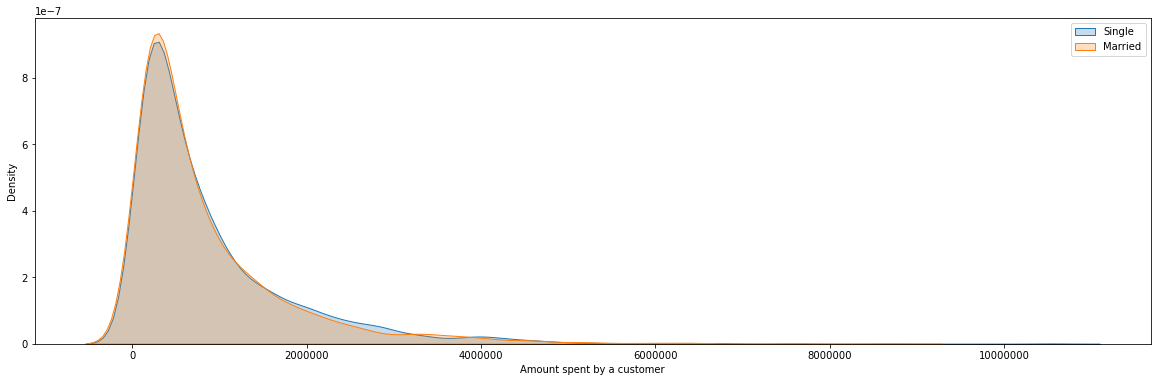

In [ ]:
plt.figure(figsize=(20, 6))
sns.kdeplot(x=df_purchase_byMarStat_Single, fill=True, label='Single')
sns.kdeplot(x=df_purchase_byMarStat_Married, fill=True, label='Married')
plt.ticklabel_format(scilimits=(-6, 8))
plt.xlabel('Amount spent by a customer')
plt.legend()
plt.show()

- From the available data points, we randomly collect samples and compute the distribution of the sample mean.
    - We perform this experiment for Single and Married seperately
    - We perform this expeiment for different sample sizes and see how the distributions change

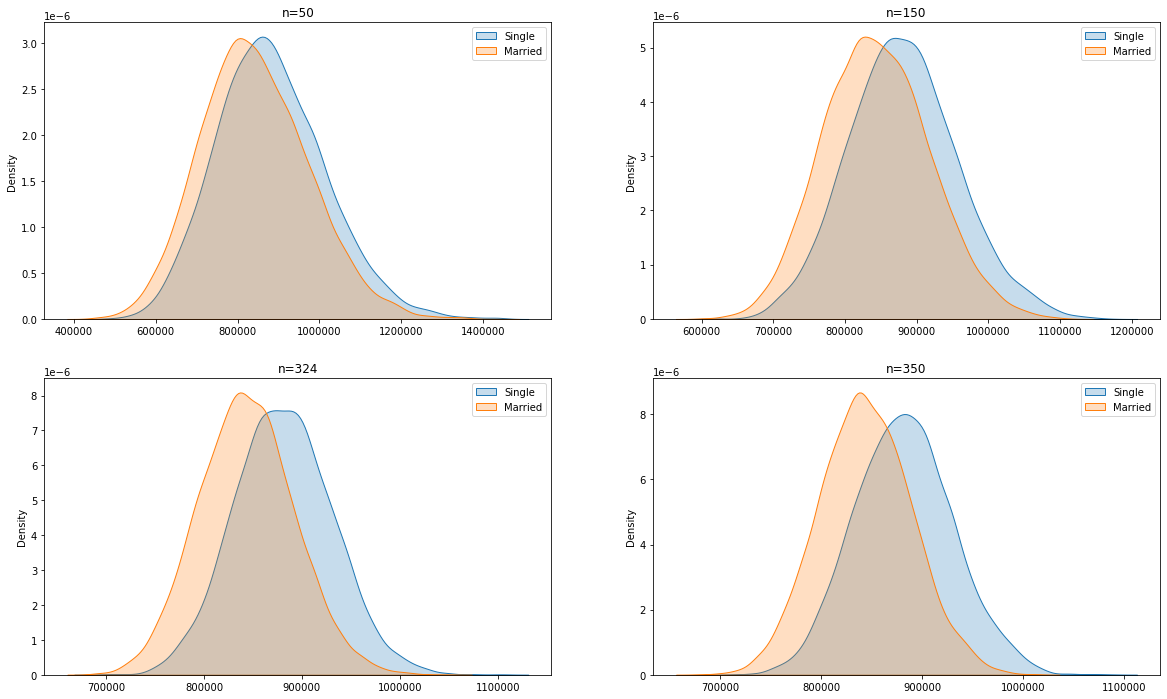

In [ ]:
sample_size = [50, 150, 324, 350]
d_MaritalStatus = {'Single': {}, 'Married': {}}
plt.figure(figsize=(20, 12))
id = 1
for size in sample_size:
    plt.subplot(2, 2, id)
    sample_means_lst_Sing = []
    sample_means_lst_Marr = []
    for _ in range(10000):
        sample_Sing = df_purchase_byMarStat_Single.sample(size)
        sample_Marr = df_purchase_byMarStat_Married.sample(size)
        sample_mean_Sing = np.mean(sample_Sing)
        sample_mean_Marr = np.mean(sample_Marr)
        sample_means_lst_Sing.append(sample_mean_Sing)
        sample_means_lst_Marr.append(sample_mean_Marr)
    f = sns.kdeplot(sample_means_lst_Sing, label=f'Single', fill=True)
    f = sns.kdeplot(sample_means_lst_Marr, label=f'Married', fill=True)
    f.ticklabel_format(scilimits=(-6, 7))
    f.legend()
    plt.title(f'n={size}')
    d_MaritalStatus['Single'][size] = (round(np.mean(sample_means_lst_Sing), 2), round(np.std(sample_means_lst_Sing), 2))
    d_MaritalStatus['Married'][size] = (round(np.mean(sample_means_lst_Marr), 2), round(np.std(sample_means_lst_Marr), 2))
    id += 1

plt.show()

***Observations:***

- We have performed this experiment for different sample sizes: 50, 150, 324, 350
- In all the cases, the sampling mean distribution is fairly Gaussian
- We are not able to clearly segregate the sampling mean distributions for Single and Married customers even for a sample size of 350

In [ ]:
pd.DataFrame(d_MaritalStatus)

,Single,Married
50,"(881377.75, 133115.36)","(841599.19, 131859.15)"
150,"(881003.48, 76537.42)","(843676.37, 73889.56)"
324,"(880906.94, 50337.36)","(843218.43, 48934.37)"
350,"(881407.09, 48791.37)","(843183.38, 45786.13)"


***95% CI for mean amount spent by Single and Married customers:***
- Single:
    - [881407-(1.96\*48791), 881407+(1.96\*48791)] = [785776, 977037]
- Married:
    - [843183-(1.96\*45786), 843183+(1.96\*45786)] = [753442, 932924]
- There is a significant overlap b/w these 2 distributions (Single vs Married)
- Since there is significant overlap, we cannot comment on the fact that the spending habits of Single and Married customers differ from each other!

## **Q5. Results when the same activity is performed for Age**
- For this question, we look at the data at the customer level and find the total amount spent by each customer

In [ ]:
df_purchase_byAge = df.groupby(['User_ID', 'Age'])['Purchase'].agg(['count', 'sum']).reset_index()

In [ ]:
df_purchase_byAge['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

- We see that there are only a few customers in some of the age-categories:
    - 0-17, 46-50, 51-55, 55+
    - We will try to group the age brackets such that we have a significant customer count in the new age brackets

In [ ]:
def age_classify(x):
    low = ['0-17', '18-25']
    middle = ['26-35', '36-45']
    if x in low:
        return 'Below 26'
    elif x in middle:
        return '26-45'
    else:
        return 'Above 45'

df_purchase_byAge['Age_Mod'] = df_purchase_byAge['Age'].apply(age_classify)
df_purchase_byAge.head()

,User_ID,Age,count,sum,Age_Mod
0,1000001,0-17,35,334093,Below 26
1,1000002,55+,77,810472,Above 45
2,1000003,26-35,29,341635,26-45
3,1000004,46-50,14,206468,Above 45
4,1000005,26-35,106,821001,26-45


In [ ]:
df_purchase_byAge['Age_Mod'].value_counts()

26-45       3220
Above 45    1384
Below 26    1287
Name: Age_Mod, dtype: int64

- After modifying the age-brackets, we have following number of data points:
    - Below 26: 1.3k
    - 26-45: 3.2k
    - Above 45: 1.4k

In [ ]:
df_purchase_byAge.groupby('Age_Mod')['sum'].describe()

,count,mean,std,min,25%,50%,75%,max
Age_Mod,,,,,,,,
26-45,3220.0,949795.174534,1.014989e+06,49288.0,255852.50,585890.0,1282410.75,10536909.0
Above 45,1384.0,714386.143064,8.139400e+05,46681.0,208172.75,423624.5,878154.75,6044415.0
Below 26,1287.0,814888.778555,8.615706e+05,53996.0,236521.00,515379.0,1036955.50,6477160.0


- We have found out the following:
    - Mean amount spent by customers below 26 (across 1.3k single customers): 814888
    - Mean amount spent by customers in 26-45 (across 3.2k married customers): 949795
    - Mean amount spent by customers above 45 (across 1.4k single customers): 714386
    - Below we have plotted the distribution of amount spent by a customer for all the age brackets. Clearly it is not gaussian.

In [ ]:
df_purchase_byAge_below26 = df_purchase_byAge.loc[df_purchase_byAge['Age_Mod']=='Below 26', 'sum']
df_purchase_byAge_26to45 = df_purchase_byAge.loc[df_purchase_byAge['Age_Mod']=='26-45', 'sum']
df_purchase_byAge_above45 = df_purchase_byAge.loc[df_purchase_byAge['Age_Mod']=='Above 45', 'sum']

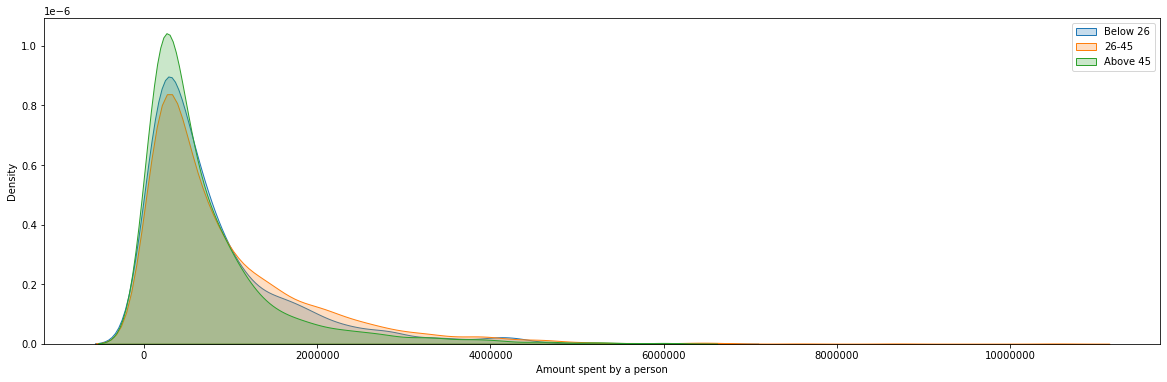

In [ ]:
plt.figure(figsize=(20, 6))
sns.kdeplot(x=df_purchase_byAge_below26, fill=True, label='Below 26')
sns.kdeplot(x=df_purchase_byAge_26to45, fill=True, label='26-45')
sns.kdeplot(x=df_purchase_byAge_above45, fill=True, label='Above 45')
plt.ticklabel_format(scilimits=(-6, 8))
plt.xlabel('Amount spent by a person')
plt.legend()
plt.show()

- From the available data points, we randomly collect samples and compute the distribution of the sample mean.
    - We perform this experiment for all the age brackets seperately
    - We perform this expeiment for different sample sizes and see how the distributions change

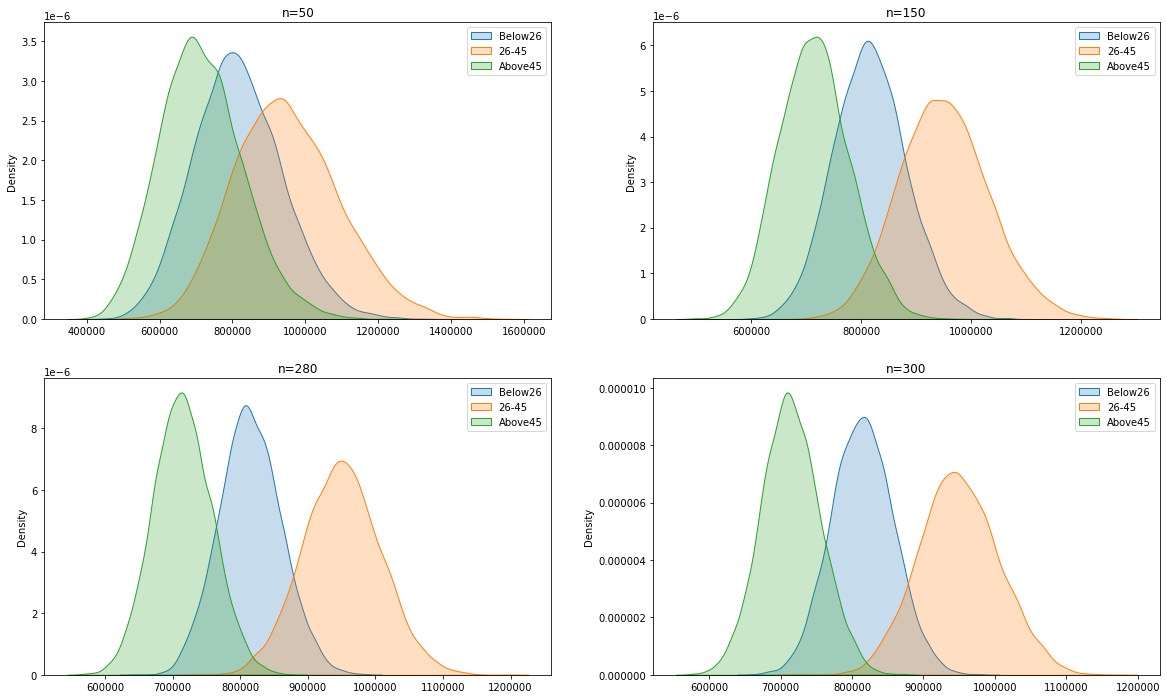

In [ ]:
sample_size = [50, 150, 280, 300]
d_Age = {'Below26': {}, '26-45': {}, 'Above45': {}}
plt.figure(figsize=(20, 12))
id = 1
for size in sample_size:
    plt.subplot(2, 2, id)
    sample_means_lst_A = []
    sample_means_lst_B = []
    sample_means_lst_C = []
    for _ in range(10000):
        sample_mean_A = np.mean(df_purchase_byAge_below26.sample(size))
        sample_mean_B = np.mean(df_purchase_byAge_26to45.sample(size))
        sample_mean_C = np.mean(df_purchase_byAge_above45.sample(size))

        sample_means_lst_A.append(sample_mean_A)
        sample_means_lst_B.append(sample_mean_B)
        sample_means_lst_C.append(sample_mean_C)

    f = sns.kdeplot(sample_means_lst_A, label=f'Below26', fill=True)
    f = sns.kdeplot(sample_means_lst_B, label=f'26-45', fill=True)
    f = sns.kdeplot(sample_means_lst_C, label=f'Above45', fill=True)
    f.ticklabel_format(scilimits=(-6, 7))
    f.legend()
    plt.title(f'n={size}')

    d_Age['Below26'][size] = (round(np.mean(sample_means_lst_A), 2), round(np.std(sample_means_lst_A), 2))
    d_Age['26-45'][size] = (round(np.mean(sample_means_lst_B), 2), round(np.std(sample_means_lst_B), 2))
    d_Age['Above45'][size] = (round(np.mean(sample_means_lst_C), 2), round(np.std(sample_means_lst_C), 2))
    id += 1

plt.show()

***Observations:***

- We have performed this experiment for different sample sizes: 50, 150, 280, 300
- In all the cases, the sampling mean distribution is fairly Gaussian
- We need a sample size of about 280 such that the distributions of sampling mean for Above45 and 26-45 barely overlap.
- We have chosen a sample size of 300 for slighly better result

In [ ]:
pd.DataFrame(d_Age)

,Below26,26-45,Above45
50,"(814914.6, 120202.38)","(949589.59, 143924.51)","(715699.93, 112937.27)"
150,"(816091.61, 66492.72)","(950945.64, 81338.36)","(714810.27, 63557.15)"
280,"(814677.63, 45875.78)","(950295.98, 57697.27)","(714390.1, 43517.86)"
300,"(814432.11, 43683.7)","(949705.82, 56053.43)","(714489.78, 41363.56)"


***95% CI for mean amount spent across different age groups:***
- Below26:
    - [814432-(1.96\*43684), 814432+(1.96\*43684)] = [728811, 900053]
- 26-45:
    - [949706-(1.96\*56053), 949706+(1.96\*56053)] = [839842, 1059570]
- Above45:
    - [714490-(1.96\*41364), 714490+(1.96\*41364)] = [633417, 795563]
- We can conclude with 95% Confidence that the mean amount spent by customers above 45 & those in range 26-45 do not overlap
- Mean amount spent by customers in range 26-45 is more than that of those above 45
- We need a sample size of around 280 to be able to make that conclusion
- There is a significant overlap of the distribution for customers below 26 with the above 2 distributions. Hence we cannot make any comment about customers below 26 with confidence.

# **Insights**

- We have a sample of Walmart transactions with a sample size of about 550K
- Insights @ transaction level (relevant only to sample):
    - Transactions made by males is ~75% of total transactions.
    - Customers in age group 18-25 have made the most number of transactions.
    - Popular product categories are: 1, 5 and 8.
    - The median transaction amount is ~8k with outlier above ~21k .   
    - Median of transction amount by males is higher than that of females.
    - Median transaction amount of city category 'C' is the highest.
    - We have also identified the top-3 expensive and cheap product categories:
        - Expensive product categories:
            - 10, 7, 15
        - Cheap product categories:
            - 19, 20, 13
- Insights @ customer level (relevant only to sample):
    - Mean number of transactions per male is higher than that of females.
    - Mean number of transactions per customer is indifferent across Marital Status.
    - Amount spent per males is higher than that of females females.
    - Amount spent per customer in City Category B is the highest and that in C is the lowest.
    - Amount spent per customer in age bracket 26-35 is highest and that in 55+ is the lowest.
    - City Category wise insight:
        - Mean amount spent per customer is highest for those customers who belong to city category A and age 26-35.
        - Mean amount spent per customer from city category C is substantially less than A and B.

- The following insights are relevant to the whole population:
    - At the transaction level, we can conclude with 95% Confidence that the mean transaction amount across all males is higher than that of females.
    - At the customer level, we can conclude with 95% Confidence that mean amount spent per male is more than that of females.
    - At the customer level, we cannot comment with any confidence about the spending habits of a customer across Marital_Status.
    - At the customer level, we can conclude with 95% Confidence that mean amount spent per customer who lie in age [26-45] is more than that of those who lie in age [Above 45].
        - However, we cannot comment with any confidence about the mean amount spent per customer who lie in age [Below 26] with respect to the above age brackets.

# **Recommendations**
- Products which fall in the popular product categories (1, 5, 8) should be stocked up in warehouse since demand for these products seem to be high.
- Males should be targetted more than females since:
    - The mean amount spent per transaction is higher for males than that of females (with 95% C)
    - The mean number of transacctions per males is higher than that of females
    - The mean amount spent per male is higher than that of females (with 95% C)
- For new product launch, products relevant to young/miidle aged customers should be launched before ytargetting any other age bracket
    - Customers in age group 26-45 should get more priority than those above 45. We have concluded that customers in age 26-45 tend to have a higher mean value of amount spent.
- During Black-Friday, Walmart can launch/stock up products catered to males and also audience in age [26-45] to boost up their revenue
- To boost the average amount spent bt females, some marketing campaign can be launched to attract females and encourage them to make more purchases.